In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample
from matplotlib.cm import get_cmap

# Просто немного того что было в слайдах по ds

## Загрузка данных

In [7]:
json_loc = "data-398-2022-09-09.json"

Читаем прям в жсон и ставим кодировку нужную

In [8]:
df = pd.read_json(json_loc,encoding='cp1251')

ок данные на месте.

##  Sort of EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11977 entries, 0 to 11976
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11977 non-null  int64  
 1   Name              11977 non-null  object 
 2   Longitude_WGS84   11977 non-null  float64
 3   Latitude_WGS84    11977 non-null  float64
 4   AdmArea           11977 non-null  object 
 5   District          11977 non-null  object 
 6   RouteNumbers      11977 non-null  object 
 7   StationName       11977 non-null  object 
 8   Direction         11977 non-null  object 
 9   Pavilion          11977 non-null  object 
 10  OperatingOrgName  11977 non-null  object 
 11  EntryState        11977 non-null  object 
 12  global_id         11977 non-null  int64  
 13  PlaceDescription  11977 non-null  object 
 14  Works             11977 non-null  object 
 15  geoData           11977 non-null  object 
 16  geodata_center    901 non-null    object

In [6]:
df.head()

,ID,Name,Longitude_WGS84,Latitude_WGS84,AdmArea,District,RouteNumbers,StationName,Direction,Pavilion,OperatingOrgName,EntryState,global_id,PlaceDescription,Works,geoData,geodata_center
0,7,"«Дербеневская наб.», 3-й Дербеневский переулок...",37.655164,55.725668,Южный административный округ,Даниловский район,А913; АС932,Дербеневская наб.,от центра,да,ГУП «Мосгортранс»,активна,889076457,"Дербеневская ул., д.1",[],"{'coordinates': [37.6551636, 55.72566817], 'ty...",NaN
1,11,"«Наб. Тараса Шевченко», набережная Тараса Шевч...",37.572274,55.749678,Западный административный округ,район Дорогомилово,А205; А622,Наб. Тараса Шевченко,в центр,нет,,активна,889076459,"Кутузовский просп., д.1",[],"{'coordinates': [37.57227413, 55.74967848], 't...",NaN
2,27,"«Кардиоцентр», 3-я Черепковская улица (в центр...",37.375509,55.757264,Западный административный округ,район Кунцево,А660; А798; А816,Кардиоцентр,в центр,да,ГУП «Мосгортранс»,активна,889076461,"3-я Черепковская ул., д.15А",[],"{'coordinates': [37.37550932, 55.7572642], 'ty...",NaN
3,33,"«Новосущёвская ул.», улица Сущёвский Вал (в це...",37.603376,55.792891,Северо-Восточный административный округ,район Марьина Роща,А126; Ас484; Ат18; Ат42,Новосущёвская ул.,в центр,да,ЗАО «Валль-СНГ»,активна,889076463,"ул. Сущёвский Вал, д.25",[],"{'coordinates': [37.60337594, 55.79289095], 't...",NaN
4,35,"«Керамический пр.», Дубнинская улица (в центр)...",37.557246,55.894608,Северный административный округ,район Восточное Дегунино,А167; А179; А499; А677; А677к,Керамический пр.,в центр,да,ГУП «Мосгортранс»,активна,889076464,"Дубнинская ул., д.85",[],"{'coordinates': [37.55724554, 55.89460802], 't...","{'coordinates': [37.55724554, 55.89460802], 't..."


Что хочется сказать, данные выглядят интересно но отдельно без геосервиса они почти бесполезны. Попробуем сделать то что в слайдах, а именно найти улицу с самым большим числом остановок

### Выделение данных по улицам

Попробуем взять столбец PlaceDescription

In [11]:
df['PlaceDescription']

0              Дербеневская ул., д.1
1            Кутузовский просп., д.1
2        3-я Черепковская ул., д.15А
3            ул. Сущёвский Вал, д.25
4               Дубнинская ул., д.85
                    ...             
11972            просп. Мира, д.121А
11973            просп. Мира, д.123Б
11974            просп. Мира, д.123Б
11975            просп. Мира, д.121А
11976            просп. Мира, д.121А
Name: PlaceDescription, Length: 11977, dtype: object

Довольно не кошерно, но чтож, будем чистить
попробуем отпилить дома и что там еще есть, проще говоря сделаем сплит по ','

In [12]:
test_data = df['PlaceDescription']

In [13]:
streets = test_data.apply(lambda row: row.split(',')[0])

In [14]:
streets.value_counts()

                          844
Варшавское ш.             114
просп. Мира               105
Ленинский просп.           93
Дмитровское ш.             89
                         ... 
ул. Садовый Квартал         1
ул. Шаганинские поляны      1
Дублинская ул.              1
Платановая ул.              1
Норильская ул.              1
Name: PlaceDescription, Length: 1694, dtype: int64

Чемпион "" - ай ай статистика мск, вместо NA поставили '' поэтому это не видно на info()

In [ ]:
Ну чтож, попробуем немного иначе, возьмем столбец Name для одной из пустых улиц

In [15]:
df[df['Street'] == ""]['Name'].loc[331]

'«Ул. Акад. Комарова», Ботаническая улица (от центра) (437)'

Ага, тут уже все неплохо

In [15]:
df["StreetsFromName"] = df['Name'].str.extract(r'»,(.*) \(\D')

In [17]:
data_to_plot = df.groupby("StreetsFromName")['Name'].nunique().sort_values(ascending=False)
data_to_plot

StreetsFromName
 проезд без названия           281
 Варшавское шоссе              181
 Калужское шоссе               116
 проспект Мира                  72
 шоссе Энтузиастов              72
                              ... 
 Проектируемый проезд № 680      1
 Васильевская улица              1
 Вагоноремонтная улица           1
 Боровицкая площадь              1
 1-й Ботанический проезд         1
Name: Name, Length: 1680, dtype: int64

Совсем другое дело, построим картиночки

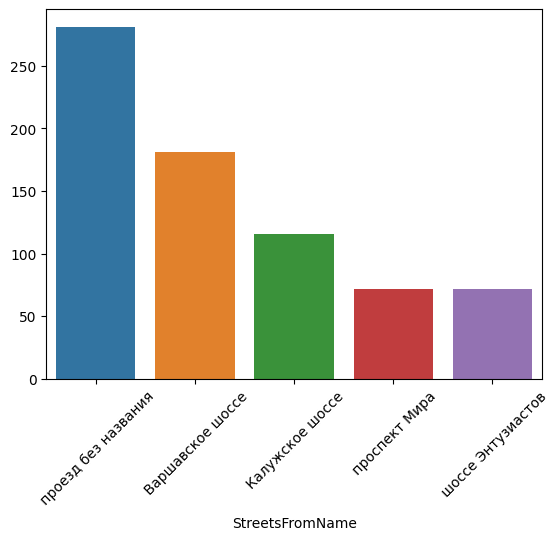

In [24]:
sns.barplot(x=data_to_plot[:5].index,y=data_to_plot[:5].values)
_=plt.xticks(rotation=45)

Ок а что по районам?

In [32]:
data_district = df.groupby('District')['Name'].nunique().sort_values(ascending=False)
data_district[:5]

District
район Южное Бутово     205
поселение Сосенское    181
район Марьино          180
Таганский район        180
район Люблино          162
Name: Name, dtype: int64

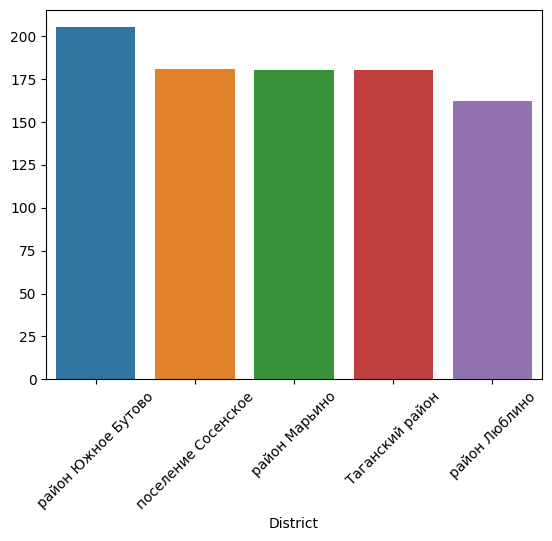

In [33]:
sns.barplot(x=data_district[:5].index,y=data_district[:5].values)
_=plt.xticks(rotation=45)

Интересно да, бутово и Коммунарка, а так же внезапно Марьино и Люблино, видио это районы где метро было построено не так давно, ну а таганский - это практически центр

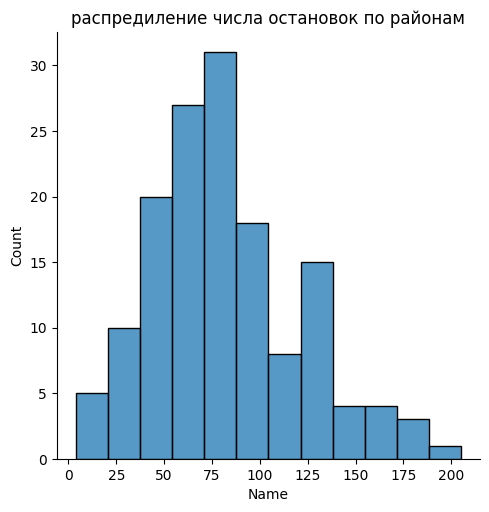

In [43]:
_=sns.displot(data_district,legend=True).set(title='распредиление числа остановок по районам')

Хм, получается у числа остановок на район вполне хорошее такое распределение

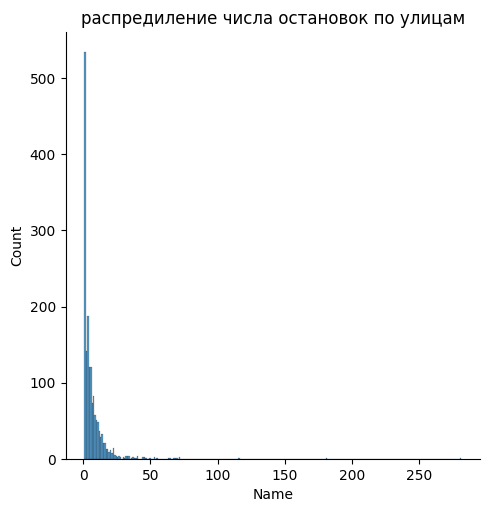

In [44]:
_=sns.displot(data_to_plot).set(title='распредиление числа остановок по улицам')

ой невидно ничего, сейчас поправим

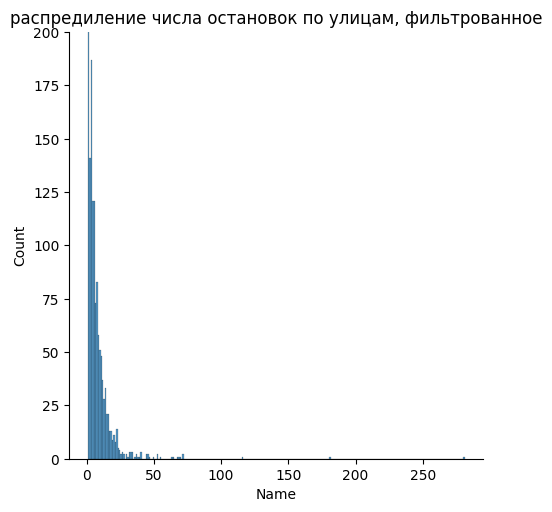

In [48]:
_=sns.displot(data_to_plot).set(title='распредиление числа остановок по улицам, фильтрованное').set(ylim=(0,200))


In [53]:
data_to_plot.describe([0.95,0.99])

count    1680.000000
mean        7.108333
std        11.447846
min         1.000000
50%         4.000000
95%        20.000000
99%        45.210000
max       281.000000
Name: Name, dtype: float64

Интересно, получается на улице в среднем 7 остановок, а линия p99 находится где то на 45 остановках, получается что наши лидеры с 100+ останокок это по сути вылеты,
которые ничего не отражают. Интересно что медиана на ровно 4х остановках, т.е. половина из 1680 улиц в мск имеет 4 остановки и меньше.
Думаю было бы оч интересно сопоставить именно данные с расстоянием между остановками и станциями метро, а так же перспективами строительства метро чтобы находить более выгодные места для покупки инвестиционных квартир\коммерческой недвижимости.

## Тут скорее про пивоты

Загрузим данные за 2015 и 2016 годы

In [56]:
df_r2015 = pd.read_excel("Russia-2015.xlsx",sheet_name="Partner")

In [57]:
df_r2016 = pd.read_excel("Russia-2016.xlsx",sheet_name="Partner")

Склеим их

In [58]:
df_export = pd.concat([df_r2015,df_r2016])

In [59]:
pd.options.display.float_format = '{:.2f}'.format

А вот тут авторам трека по DS хочется сказать что пивоты не такая простая тема чтобы вот так ее подавать, лично мне больше всего помогла вот такая картинка
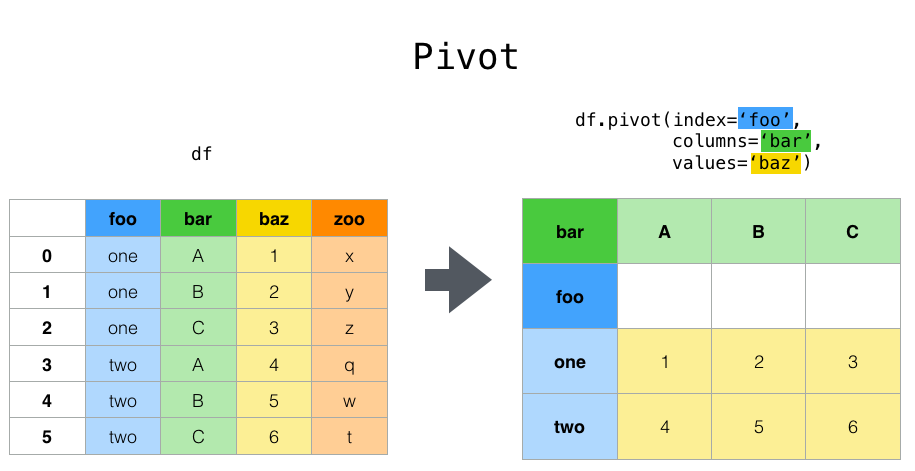

In [60]:
df_export.pivot_table(index=['Year'],
    values='Export (US$ Thousand)', aggfunc='sum')

,Export (US$ Thousand)
Year,
2015,975175066.12
2016,901642445.31


In [25]:
df_export.pivot_table(index=['Year', 'Partner Name'],
    values='Export (US$ Thousand)', aggfunc='sum').sort_values('Export (US$ Thousand)', ascending=False)

Export (US$ Thousand)
Year Partner Name                                         
2015  World                                   343907651.83
2016  World                                   301780443.39
     Europe & Central Asia                    193926312.70
2015 Europe & Central Asia                    188344810.70
     East Asia & Pacific                       63818526.25
...                                                    ...
2016 Nauru                                            0.00
2015 Fr. So. Ant. Tr                                  0.00
2016 Montserrat                                       0.00
     Bouvet Island                                    0.00
2015 United States Minor Outlying I                   0.00

[463 rows x 1 columns]

Этот функционал аналогичен сводным таблицам в экселе, in fact в английской локали в экселе они тоже пивоты

In [26]:
df_export_filtered = df_export[df_export['Partner Name'] != 'Europe & Central Asia']

In [27]:
df_export_filtered.pivot_table(index=['Year', 'Partner Name'],
    values='Export (US$ Thousand)', aggfunc='sum').sort_values('Export (US$ Thousand)', ascending=False)

,,Export (US$ Thousand)
Year,Partner Name,
2015,World,343907651.83
2016,World,301780443.39
2015,East Asia & Pacific,63818526.25
2016,East Asia & Pacific,59469328.54
2015,Unspecified,53098256.49
...,...,...
2016,Nauru,0.00
2015,Fr. So. Ant. Tr,0.00
2016,Montserrat,0.00


In [28]:
exclude = ['Europe & Central Asia', 'East Asia & Pacific', ' World',
    'Unspecified', 'Middle East & North Africa']

In [29]:
export_filtered = df_export[-df_export['Partner Name'].isin(exclude)]

In [30]:
export_filtered.pivot_table(index=['Year', 'Partner Name'], 
                values='Export (US$ Thousand)', aggfunc='sum')\
            .sort_values('Export (US$ Thousand)', ascending=False)


Export (US$ Thousand)
Year Partner Name                                    
2015 Netherlands                          40198496.43
2016 Netherlands                          31816200.18
     China                                29953376.57
2015 China                                28334954.57
2016 Germany                              21452143.28
...                                               ...
     St. Kitts and Nevis                         0.00
     Fr. So. Ant. Tr                             0.00
2015 Kiribati                                    0.00
     British Indian Ocean Ter.                   0.00
2016 Pitcairn                                    0.00

[453 rows x 1 columns]

In [31]:
export_pivot = export_filtered.pivot_table(index=['Year', 'Partner Name'],
                values='Export (US$ Thousand)', aggfunc='sum')\
            .sort_values(
                ['Year', 'Export (US$ Thousand)'],
                ascending=[True, False]
            )

А еще можно разные агрегационные функции передавать, в том числе кастомные, т.к. пивот принимает callable

In [32]:
export_pivot[export_pivot.index.get_level_values('Year') == 2015]

Export (US$ Thousand)
Year Partner Name                                         
2015 Netherlands                               40198496.43
     China                                     28334954.57
     Italy                                     16204284.05
     Germany                                   15906242.25
     Japan                                     14426352.10
...                                                    ...
     Turks and Caicos Isl.                            0.00
     Tuvalu                                           0.00
     United States Minor Outlying I                   0.00
     Vanuatu                                          0.00
     Wallis and Futura Isl.                           0.00

[226 rows x 1 columns]

Да таки умеет pandas читать html только нужно поставить 

In [33]:
URL = "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%BF%D0%BE%D0%BB%D0%B8%D1%82%D0%B5%D0%BD%D0%B0"
result = pd.read_html(URL, attrs={"class": "standard"}, header=0)
result[0].head()

,Unnamed: 0,Название станцииПрежние названия,Датаоткрытия,Пере-садки,"Глубина,м[1]",Тип конструкции,Координаты,Вид станции
0,NaN,Бульвар РокоссовскогоУлица Подбельского (с 01....,1 августа 1990,NaN,−8,колоннаямелкого заложениятрёхпролётная,55°48′53″ с. ш. 37°44′03″ в. д.HЯ,NaN
1,NaN,Черкизовская,1 августа 1990,NaN,−9,односводчатаямелкого заложения,55°48′14″ с. ш. 37°44′41″ в. д.HЯ,NaN
2,NaN,Преображенская площадь,31 декабря 1965,NaN,−8,колоннаямелкого заложениятрёхпролётная,55°47′47″ с. ш. 37°42′54″ в. д.HЯ,NaN
3,NaN,Сокольники,15 мая 1935,NaN,−9,колоннаямелкого заложениятрёхпролётная,55°47′20″ с. ш. 37°40′49″ в. д.HЯ,NaN
4,NaN,Красносельская,15 мая 1935,NaN,−8,колоннаямелкого заложениядвухпролётная,55°46′48″ с. ш. 37°40′02″ в. д.HЯ,NaN


In [34]:
%matplotlib inline

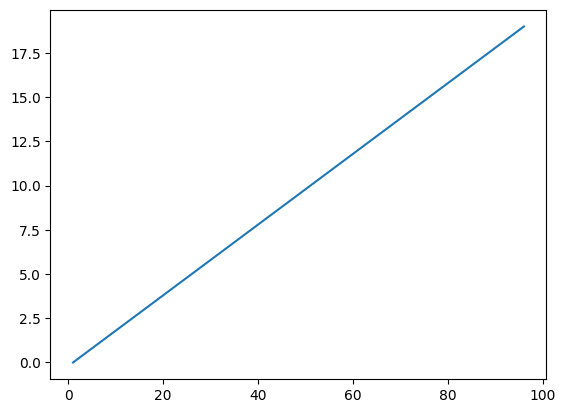

In [35]:
data_x1 = range(1, 100, 5)
data_y1 = range(0, 20)
plt.plot(data_x1, data_y1)
plt.show()

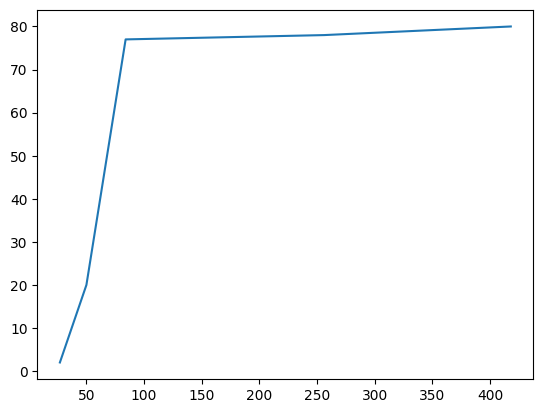

In [36]:
data_x2 = sample(range(500), 5)
data_y2 = sample(range(100), 5)
data_x2.sort()
data_y2.sort()
plt.plot(data_x2, data_y2)
plt.show()

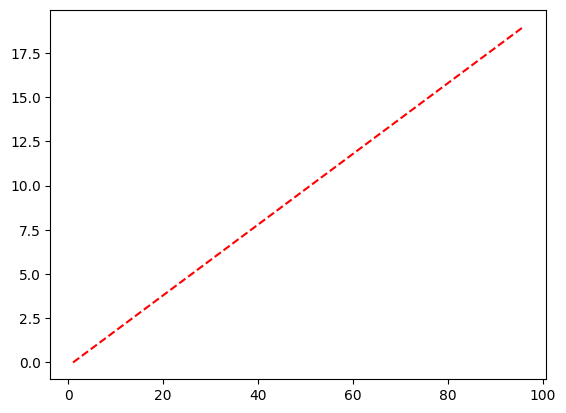

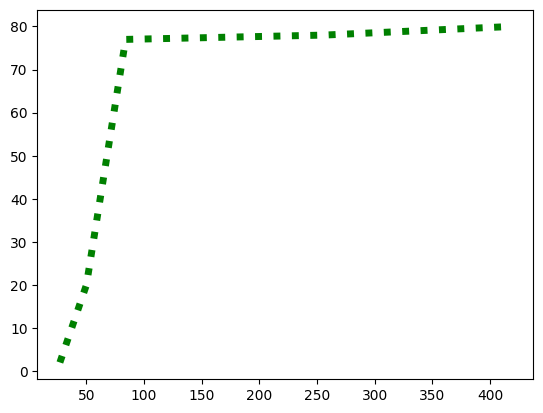

In [37]:
plt.plot(data_x1, data_y1, color='red', linestyle='dashed')
plt.figure()
plt.plot(data_x2, data_y2, color='green', linestyle='dotted', linewidth=5)
plt.show()

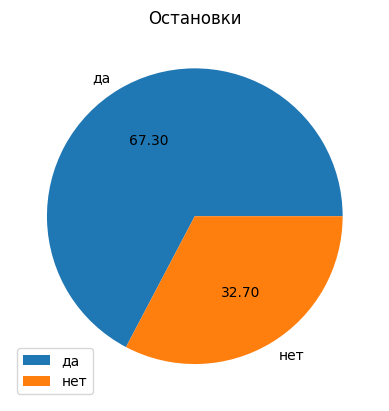

In [38]:
pavilion_count = df.groupby(['Pavilion']).size()
plt.pie(pavilion_count, labels=pavilion_count.index, autopct='%.2f')
plt.title('Остановки')
plt.legend()
plt.show()

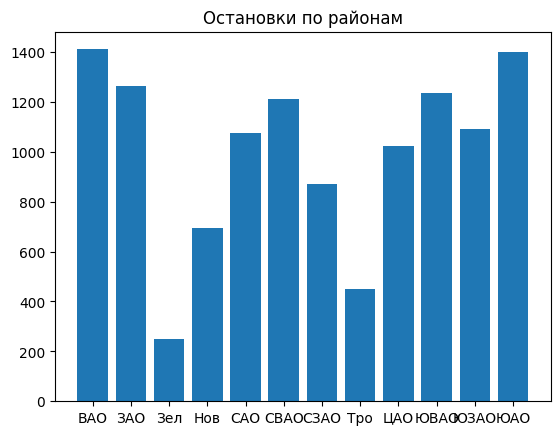

In [39]:
admarea_count = df.groupby(['AdmArea']).size()
labels = [
    'ВАО', 'ЗАО', 'Зел', 'Нов', 'САО', 'СВАО', 'СЗАО',
    'Тро', 'ЦАО', 'ЮВАО', 'ЮЗАО', 'ЮАО'
]
plt.bar(labels, admarea_count)
plt.title('Остановки по районам')
plt.show()

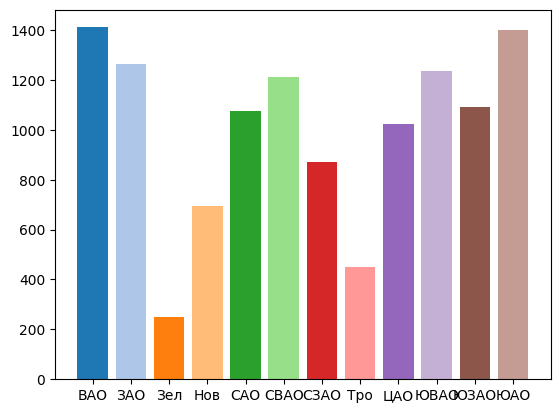

In [40]:
cmap = get_cmap('tab20')
colors = [cmap(i) for i in range(len(labels))]
plt.bar(labels, admarea_count, color=colors)
plt.show()

## Титаник

In [72]:
df_titanic = pd.read_csv("./titanic/train.csv")

In [73]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [74]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Есть пропуски, заполним их

In [75]:
embarked = df_titanic.groupby('Embarked').count()['PassengerId']
embarked_max = embarked[embarked == embarked.max()].index[0]
df_titanic.loc[df_titanic['Embarked'].isnull(), 'Embarked'] = embarked_max

In [76]:
df_titanic['Title'] = df_titanic['Name'].str.extract('([A-Za-z]+)\.')
df_titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [77]:
mapping = {'Don': 'RoyaltyM', 'Mme': 'Miss', 'Ms': 'Miss',
    'Major': 'Officer', 'Lady': 'RoyaltyF', 'Sir': 'RoyaltyM', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Officer',
    'Countess': 'RoyaltyF', 'Jonkheer': 'RoyaltyM'}

In [78]:
df_titanic.replace({'Title': mapping}, inplace=True)
df_titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'RoyaltyM', 'Rev', 'Dr', 'Officer',
       'RoyaltyF'], dtype=object)

А тут мы сделали из приставок статусы социальные, ну ок)

In [79]:
age_med = df_titanic.groupby('Title')['Age'].median()

Заполняем пропуски

In [81]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic.groupby('Title')['Age'].transform('median'))

In [82]:
df_titanic['Age'].isna().sum()

0

Аналогичный код ниже) но я написал нечто pandas-way

In [49]:
#for title, age in age_med.iteritems():
#    filter_age = df_titanic['Age'].isnull()
#    filter_title = df_titanic['Title'] == title
#    df_titanic.loc[filter_age & filter_title, 'Age'] = age

In [83]:
df_titanic.pivot_table(values='PassengerId', index='Pclass',
    columns='Survived', aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Вот у нас и есть классы для предсказаний

<AxesSubplot:xlabel='Pclass'>

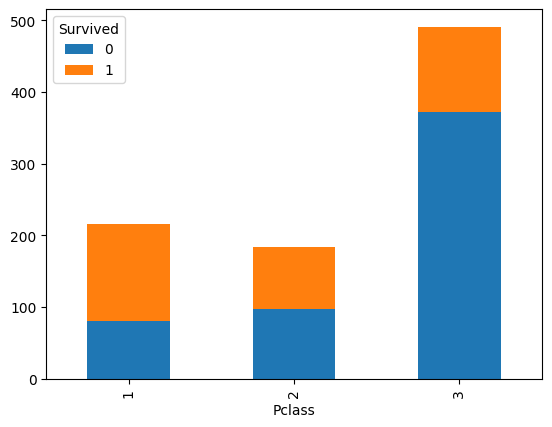

In [85]:
surv_pclass = df_titanic.pivot_table(values='PassengerId', index='Pclass',
    columns='Survived', aggfunc='count')

surv_pclass.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Title'>

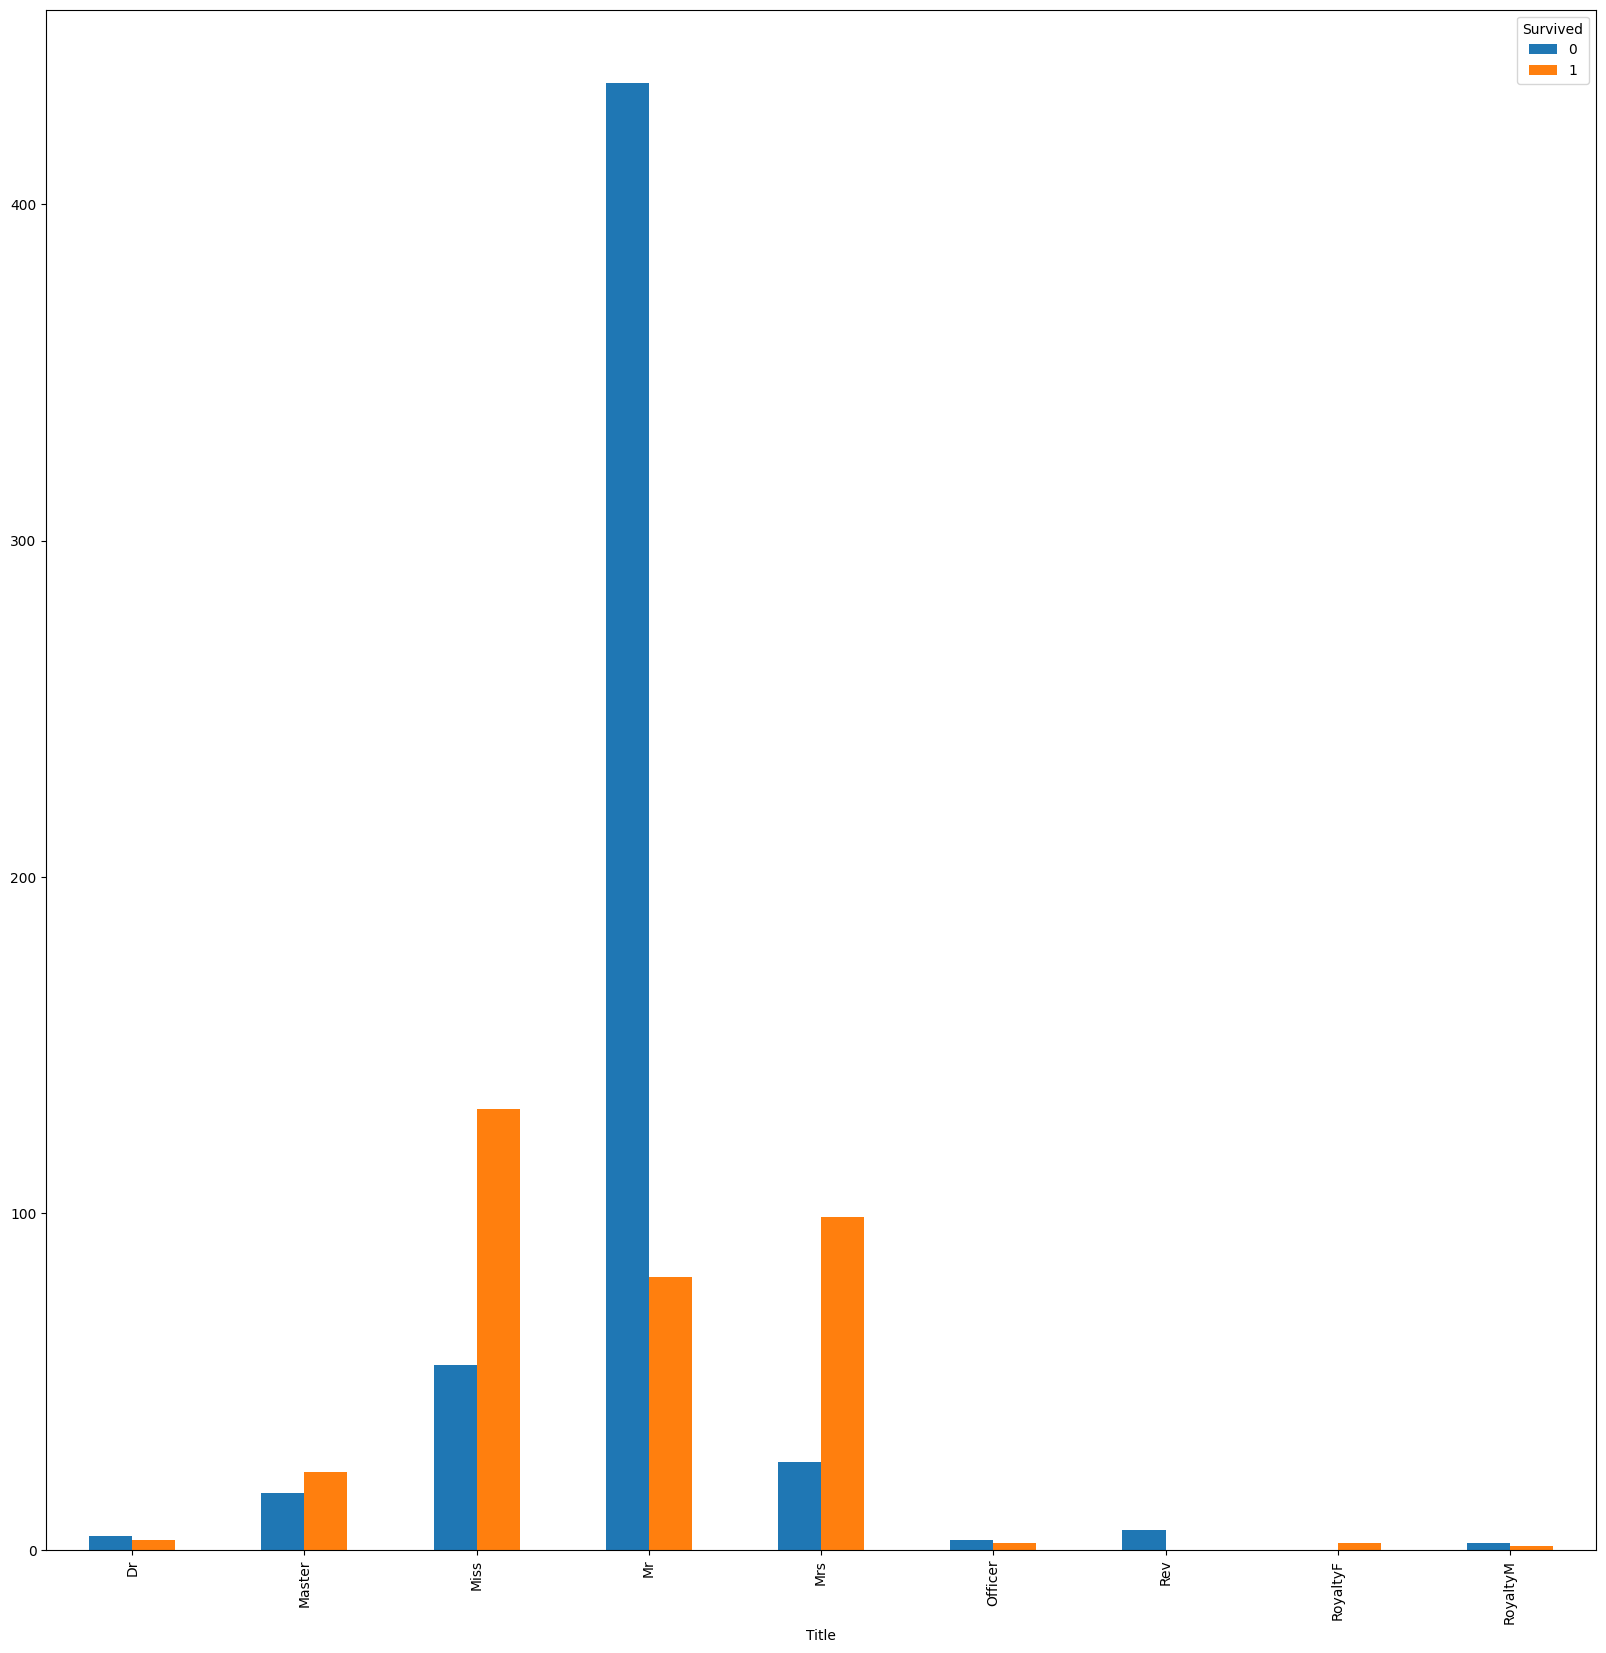

In [86]:
surv_title = df_titanic.pivot_table(values='PassengerId', index='Title',
    columns='Survived', aggfunc='count')

surv_title.plot(kind='bar', figsize=(20,20))